In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Set up environment and prepare dataset

In [3]:
# import packages
import pandas as pd
import re
import matplotlib.pyplot as plt

In [4]:
# load tsv file
combined_protein = pd.read_csv('/content/drive/MyDrive/Monash_data_science/24s2/BMS5021/topic_3/combined_protein.tsv', sep='\t')

## Preprocess the data


In [5]:
# preview dataset
combined_protein.head()

,Protein Group,SubGroup,Protein,Protein ID,Entry Name,Gene Names,Protein Length,Coverage,Organism,Protein Existence,...,qx017177_NSP2_2 Total Intensity,qx017177_NSP2_2 Unique Intensity,qx017177_NSP2_2 Razor Intensity,qx017178_NSP2_3 Total Spectral Count,qx017178_NSP2_3 Unique Spectral Count,qx017178_NSP2_3 Razor Spectral Count,qx017178_NSP2_3 Total Intensity,qx017178_NSP2_3 Unique Intensity,qx017178_NSP2_3 Razor Intensity,Indistinguishable Proteins
0,1,a,SARS_CoV_2_nsp14,SARS_CoV_2_nsp14,NaN,NaN,0,0,NaN,NaN,...,2221540,2221540,2221540,4,4,4,1512859,1512859,1512859,NaN
1,2,a,SARS_CoV_2_nsp10,SARS_CoV_2_nsp10,NaN,NaN,0,0,NaN,NaN,...,1480255,1480255,1480255,3,3,3,1255336,1255336,1255336,NaN
2,3,a,SARS_CoV_2_nsp14,SARS_CoV_2_nsp14,NaN,NaN,0,0,NaN,NaN,...,2221540,2221540,2221540,4,4,4,1512859,1512859,1512859,NaN
3,4,a,SARS_CoV_2_nsp5,SARS_CoV_2_nsp5,NaN,NaN,0,0,NaN,NaN,...,1968653,1968653,1968653,14,14,14,39050263,39050263,39050263,NaN
4,5,a,SARS_CoV_2_nsp7,SARS_CoV_2_nsp7,NaN,NaN,0,0,NaN,NaN,...,180692,180692,180692,2,2,2,112047,112047,112047,NaN


In [6]:
# check column names
combined_protein.columns

Index(['Protein Group', 'SubGroup', 'Protein', 'Protein ID', 'Entry Name',
       'Gene Names', 'Protein Length', 'Coverage', 'Organism',
       'Protein Existence', 'Description', 'Protein Probability',
       'Top Peptide Probability', 'Unique Stripped Peptides',
       'Summarized Total Spectral Count', 'Summarized Unique Spectral Count',
       'Summarized Razor Spectral Count',
       'qx017084_EGFP_1 Total Spectral Count',
       'qx017084_EGFP_1 Unique Spectral Count',
       'qx017084_EGFP_1 Razor Spectral Count',
       'qx017084_EGFP_1 Total Intensity', 'qx017084_EGFP_1 Unique Intensity',
       'qx017084_EGFP_1 Razor Intensity',
       'qx017098_EGFP_2 Total Spectral Count',
       'qx017098_EGFP_2 Unique Spectral Count',
       'qx017098_EGFP_2 Razor Spectral Count',
       'qx017098_EGFP_2 Total Intensity', 'qx017098_EGFP_2 Unique Intensity',
       'qx017098_EGFP_2 Razor Intensity',
       'qx017108_EGFP_4 Total Spectral Count',
       'qx017108_EGFP_4 Unique Spectral Cou

Columns to concern about:
- Protein info:
      'Protein', 'Protein ID', 'Entry Name', 'Gene Names', 'Protein Length', 'Coverage', 'Description'
- How peptides were identified for each protein:
      'Unique Stripped Peptides', 'Summarized Total Spectral Count', 'Summarized Unique Spectral Count', 'Summarized Razor Spectral Count'
- Intensity information for the identified proteins for each of your samples:
      'Unique intensity' (for each sample)

In [7]:
# clean up column names

def simplify_column_names(df):
    pattern = re.compile(r'qx\d+_(.*)')
    df.columns = [pattern.sub(r'\1', col) for col in df.columns]
    return df

combined_protein = simplify_column_names(combined_protein)

combined_protein.columns

Index(['Protein Group', 'SubGroup', 'Protein', 'Protein ID', 'Entry Name',
       'Gene Names', 'Protein Length', 'Coverage', 'Organism',
       'Protein Existence', 'Description', 'Protein Probability',
       'Top Peptide Probability', 'Unique Stripped Peptides',
       'Summarized Total Spectral Count', 'Summarized Unique Spectral Count',
       'Summarized Razor Spectral Count', 'EGFP_1 Total Spectral Count',
       'EGFP_1 Unique Spectral Count', 'EGFP_1 Razor Spectral Count',
       'EGFP_1 Total Intensity', 'EGFP_1 Unique Intensity',
       'EGFP_1 Razor Intensity', 'EGFP_2 Total Spectral Count',
       'EGFP_2 Unique Spectral Count', 'EGFP_2 Razor Spectral Count',
       'EGFP_2 Total Intensity', 'EGFP_2 Unique Intensity',
       'EGFP_2 Razor Intensity', 'EGFP_4 Total Spectral Count',
       'EGFP_4 Unique Spectral Count', 'EGFP_4 Razor Spectral Count',
       'EGFP_4 Total Intensity', 'EGFP_4 Unique Intensity',
       'EGFP_4 Razor Intensity', 'NSP2_1 Total Spectral Count',
 

## How many proteins were identified in total?

In [8]:
# count unique protein ids
combined_protein['Protein ID'].nunique()


1137

There are 1137 proteins identified in total.

## What is the distribution of number of peptides identified per protein? (Use the “Unique Stripped Peptides” column for this.)

In [9]:
combined_protein['Unique Stripped Peptides'].describe()

# combined_protein['Unique Stripped Peptides'].value_counts()

,Unique Stripped Peptides
count,1138.000000
mean,7.630931
std,7.971750
min,1.000000
25%,3.000000
50%,5.000000
75%,10.000000
max,94.000000


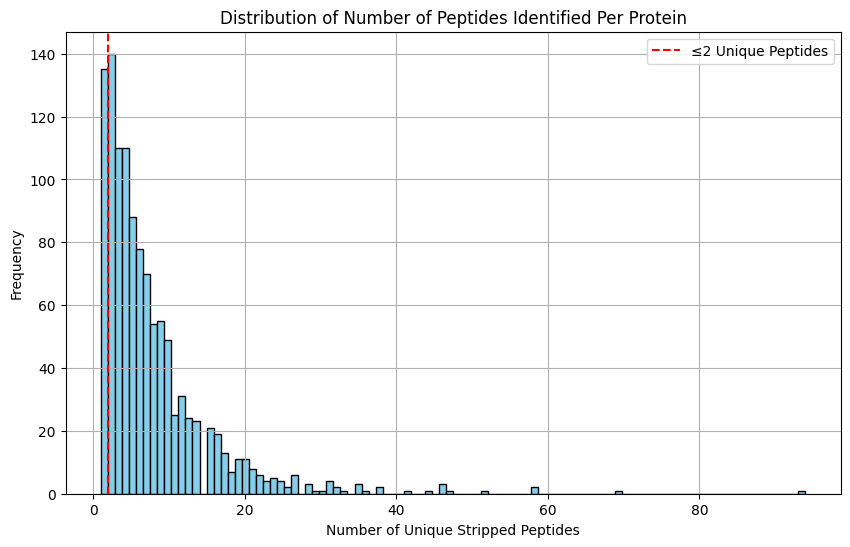

In [10]:
# plot histogram

plt.figure(figsize=(10, 6))
plt.hist(combined_protein['Unique Stripped Peptides'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Peptides Identified Per Protein')
plt.xlabel('Number of Unique Stripped Peptides')
plt.ylabel('Frequency')
plt.axvline(2, color='red', linestyle='--', label='≤2 Unique Peptides')
plt.legend()
plt.grid(True)
plt.show()



In [11]:
# Calculate the frequencies
frequency = combined_protein['Unique Stripped Peptides'].value_counts().sort_index()

# Calculate the percentage of proteins with unique peptides <= 1
total_proteins = len(combined_protein)
proteins_with_peptides_1_or_less = frequency.loc[:1].sum()
percent_with_1_or_less = (proteins_with_peptides_1_or_less / total_proteins) * 100

# Print out the calculated results
print(f"Percentage of proteins with ≤1 unique peptides: {percent_with_1_or_less:.2f}%")

Percentage of proteins with ≤1 unique peptides: 11.86%


When performing protein sequences, the algorithm will use >= 2 peptide/protein to make inferrence and identify a protein sequence.

The distribution of the number of peptides per protein can provide therotical fundation for this threshold.

## What’s the distribution of lengths for the identified protein?
(This doesn’t hold any special importance for the experiment but is more to make you appreciate the varied lengths of proteins.)

In [12]:
combined_protein['Protein Length'].describe()

# combined_protein['Protein Length'].value_counts()

,Protein Length
count,1138.000000
mean,454.265378
std,484.160879
min,0.000000
25%,203.000000
50%,338.000000
75%,558.000000
max,8797.000000


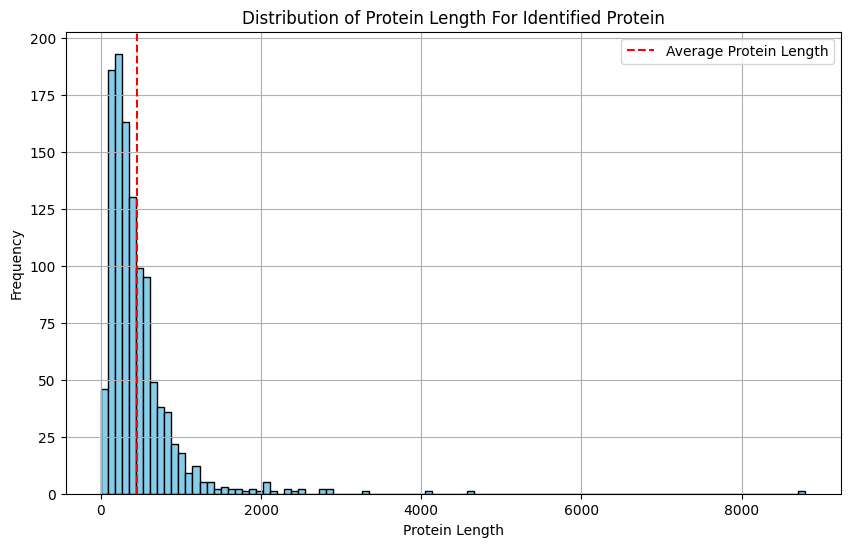

In [13]:
# plot histogram

plt.figure(figsize=(10, 6))
plt.hist(combined_protein['Protein Length'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Protein Length For Identified Protein')
plt.xlabel('Protein Length')
plt.ylabel('Frequency')

plt.axvline(454.27, color='red', linestyle='--', label='Average Protein Length')
plt.legend()
plt.grid(True)
plt.show()


## How many proteins were identified in each sample?


In [14]:
# # define function to count non zero value
# def count_non_zero(df, column_names):
#   counts = {}
#
#   for sample in samples:
#       column_name = f'{sample} Unique Intensity'
#       counts[sample] = (combined_protein[column_name] != 0).sum()
#
#   return counts
#
# # declare sample
# samples = ['EGFP_1', 'EGFP_2', 'EGFP_4', 'NSP2_1', 'NSP2_2', 'NSP2_3']
#
# counts = count_non_zero(combined_protein, samples)
#
# for sample, count in counts.items():
#   print(f"Number of proteins identified in {sample}: {count}")

In [15]:
# declare sample
samples = ['EGFP_1', 'EGFP_2', 'EGFP_4', 'NSP2_1', 'NSP2_2', 'NSP2_3']

# # extract column name
# column_name = []
# for sample in samples:
#   name = f'{sample} Unique Intensity'
#   column_name.append(name)

column_names = ['EGFP_1 Unique Intensity', 'EGFP_2 Unique Intensity', 'EGFP_4 Unique Intensity', 'NSP2_1 Unique Intensity', 'NSP2_2 Unique Intensity', 'NSP2_3 Unique Intensity']

# get protein for control group samples
EGFP_1 = list(combined_protein[combined_protein['EGFP_1 Unique Intensity'] != 0]['Protein ID'])
EGFP_2 = list(combined_protein[combined_protein['EGFP_2 Unique Intensity'] != 0]['Protein ID'])
EGFP_4 = list(combined_protein[combined_protein['EGFP_4 Unique Intensity'] != 0]['Protein ID'])

# get protein for covid group samples
NSP2_1 = list(combined_protein[combined_protein['NSP2_1 Unique Intensity'] != 0]['Protein ID'])
NSP2_2 = list(combined_protein[combined_protein['NSP2_2 Unique Intensity'] != 0]['Protein ID'])
NSP2_3 = list(combined_protein[combined_protein['NSP2_3 Unique Intensity'] != 0]['Protein ID'])

## How many proteins were identified in each sample group? (I.e. SARS-CoV-2 bait vs EGFP control.)

In [16]:
covid_proteins = NSP2_1 + NSP2_2 + NSP2_3
covid_proteins = set(covid_proteins)

control_proteins = EGFP_1 + EGFP_2 + EGFP_4
control_proteins = set(control_proteins)

print(f"Number of proteins identified in the control group: {len(control_proteins)}")
print(f"Number of proteins identified in the covid group: {len(covid_proteins)}")

Number of proteins identified in the control group: 926
Number of proteins identified in the covid group: 1017


In [17]:
# # # declare sample group
# control_samples = ['EGFP_1', 'EGFP_2', 'EGFP_4']
# covid_samples = ['NSP2_1', 'NSP2_2', 'NSP2_3']
#
#
# # Function to extract unique proteins for a group
# def get_unique_proteins(df, samples):
#     unique_proteins = set()
#     for sample in samples:
#         # Identify rows where 'Unique Intensity' for the sample is not zero
#         mask = df[f'{sample} Unique Intensity'] != 0
#         # Add protein IDs from these rows to the set
#         unique_proteins.update(df[mask]['Protein ID'].unique())
#     return unique_proteins
#
# # Calculate unique proteins for each group
# control_proteins = get_unique_proteins(combined_protein, control_samples)
# covid_proteins = get_unique_proteins(combined_protein, covid_samples)
#
# # Output the results
# print(f"Unique proteins identified in the control group: {len(control_proteins)}")
# print(f"Unique proteins identified in the covid group: {len(covid_proteins)}")

## How reproducible are the replicates for each sample group?

In [18]:
# create correlation matrix for covid group
covid = ['NSP2_1 Unique Intensity', 'NSP2_2 Unique Intensity', 'NSP2_3 Unique Intensity']
combined_protein[covid].corr()

,NSP2_1 Unique Intensity,NSP2_2 Unique Intensity,NSP2_3 Unique Intensity
NSP2_1 Unique Intensity,1.000000,0.990646,0.989126
NSP2_2 Unique Intensity,0.990646,1.000000,0.996416
NSP2_3 Unique Intensity,0.989126,0.996416,1.000000


In [19]:
# create correlation matrix for control group
control = ['EGFP_1 Unique Intensity', 'EGFP_2 Unique Intensity', 'EGFP_4 Unique Intensity']
combined_protein[control].corr()

,EGFP_1 Unique Intensity,EGFP_2 Unique Intensity,EGFP_4 Unique Intensity
EGFP_1 Unique Intensity,1.000000,0.318192,0.692082
EGFP_2 Unique Intensity,0.318192,1.000000,0.313779
EGFP_4 Unique Intensity,0.692082,0.313779,1.000000


The control protein are not interacting with anything specific.

There are more similarities for protein among covid group than control group.

## Is your actual bait protein detected in your SARS-CoV-2 bait samples? Is it absent in your EGFP control samples?

Method 1 takes proteins detected from any sample in covid group, and proteins detected from any samples in control group. Find the ones absent from control and present in covid group.

Method 2 takes proteins detected from all samples in covid group, and for proteins absent from all samples in control group, get the difference. This method produces a more strict subset of proteins, and is consistent with the list found by using excel filter.

In [20]:
# Get the entire list of protein
protein = set(combined_protein['Protein ID'])

# Find the ones absent from control
control_absent = protein - control_proteins

# Find the ones detected in covid group
protein_diff_1 = covid_proteins & control_absent

len(protein_diff_1)

185

In [21]:
# samples = ['EGFP_1', 'EGFP_2', 'EGFP_4', 'NSP2_1', 'NSP2_2', 'NSP2_3']

# protein in all covid group
covid_protein_common = set(NSP2_1) & set(NSP2_2) & set(NSP2_3)
len(covid_protein_common)

# find protein absent from each sample in control group
EGFP_1_absent = protein - set(EGFP_1)
EGFP_2_absent = protein - set(EGFP_2)
EGFP_4_absent = protein - set(EGFP_4)

# find protein absent from any sample in control group
EGFP_absent = EGFP_1_absent & EGFP_2_absent & EGFP_4_absent

protein_diff_2 = covid_protein_common & EGFP_absent
len(protein_diff_2)

50

## For each sample, what is the distribution of “Unique Intensity”? Is this distribution uniform across the sample replicates?


In [22]:
# get Unique Intensity for control group samples
EGFP_1_ui = combined_protein['EGFP_1 Unique Intensity']
EGFP_2_ui = combined_protein['EGFP_2 Unique Intensity']
EGFP_4_ui = combined_protein['EGFP_4 Unique Intensity']

# get Unique Intensity for covid group samples
NSP2_1_ui = combined_protein['NSP2_1 Unique Intensity']
NSP2_2_ui = combined_protein['NSP2_2 Unique Intensity']
NSP2_3_ui = combined_protein['NSP2_3 Unique Intensity']

ui = [EGFP_1_ui, EGFP_2_ui, EGFP_4_ui, NSP2_1_ui, NSP2_2_ui, NSP2_3_ui]

ui = pd.concat(ui, axis=1)

ui.describe()

,EGFP_1 Unique Intensity,EGFP_2 Unique Intensity,EGFP_4 Unique Intensity,NSP2_1 Unique Intensity,NSP2_2 Unique Intensity,NSP2_3 Unique Intensity
count,1.138000e+03,1.138000e+03,1.138000e+03,1.138000e+03,1.138000e+03,1.138000e+03
mean,5.224889e+06,1.075561e+07,5.352455e+06,1.125669e+07,9.763817e+06,1.322718e+07
std,2.368805e+07,7.330841e+07,2.252782e+07,1.538440e+08,1.475765e+08,2.025755e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.275340e+05,1.068638e+06,2.967885e+05,9.802840e+05,4.055135e+05,7.414640e+05
75%,2.665525e+06,4.706961e+06,2.232615e+06,3.871432e+06,2.279726e+06,3.522320e+06
max,5.422543e+08,1.998009e+09,3.610069e+08,5.122105e+09,4.916069e+09,6.754567e+09


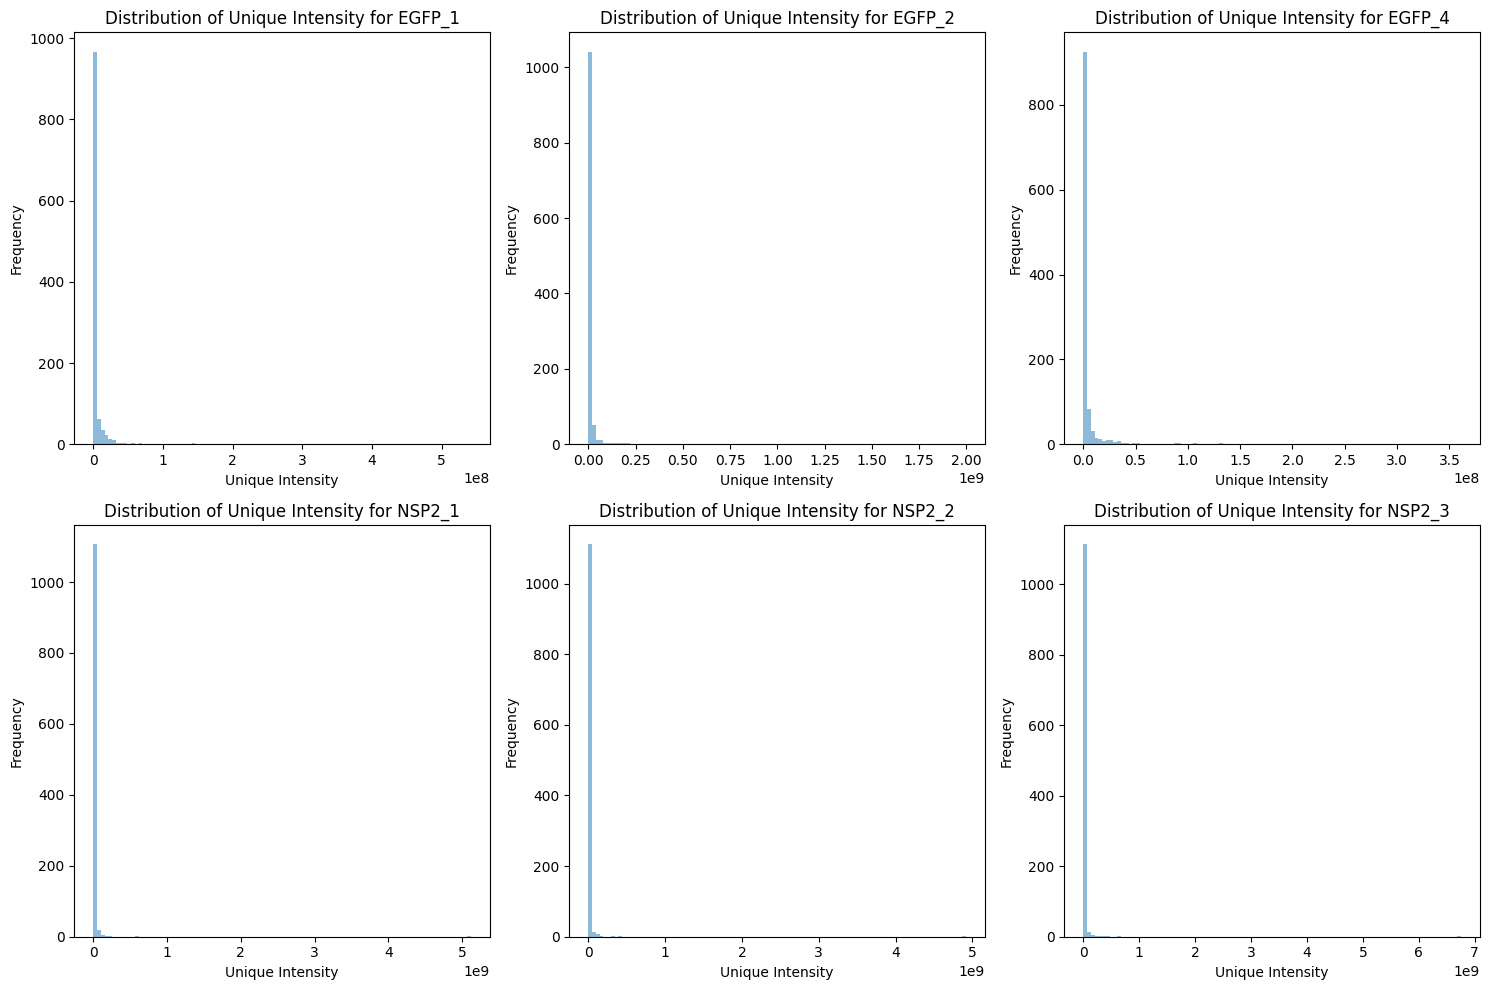

In [23]:
# plot distribution of unique intensity for each sample
ui = [EGFP_1_ui, EGFP_2_ui, EGFP_4_ui, NSP2_1_ui, NSP2_2_ui, NSP2_3_ui]
samples = ['EGFP_1', 'EGFP_2', 'EGFP_4', 'NSP2_1', 'NSP2_2', 'NSP2_3']

# Set up the grid layout: 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust the overall figure size

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each Series and axes element for plotting
for sample_ui, name, ax in zip(ui, samples, axes):
    sample_ui.plot(kind='hist', bins=100, alpha=0.5, ax=ax)
    ax.set_title(f'Distribution of Unique Intensity for {name}')
    ax.set_xlabel('Unique Intensity')
    ax.set_ylabel('Frequency')

# Tight layout to avoid overlap
plt.tight_layout()

# Display all plots
plt.show()

## For each protein, how many samples was it detected in in total, as well as within each group?

E.g. a protein might be detected in two of the three EGFP control samples and one of the SARS-CoV-2 baits, or it might be present in all six samples, or all three of one condition but none of the others, etc. Is there a good way to represent this information? If you’re in Excel or working with a dataframe, you could set up some additional columns to report this.

In [24]:
samples = ['EGFP_1', 'EGFP_2', 'EGFP_4', 'NSP2_1', 'NSP2_2', 'NSP2_3']
column_names = ['EGFP_1 Unique Intensity', 'EGFP_2 Unique Intensity', 'EGFP_4 Unique Intensity', 'NSP2_1 Unique Intensity', 'NSP2_2 Unique Intensity', 'NSP2_3 Unique Intensity']

protein_across_sample = []

for column_name in column_names:
  combined_protein[f'{column_name} Count'] = combined_protein[column_name].apply(lambda x: 1 if x != 0 else 0)
  protein_across_sample.append(combined_protein[f'{column_name} Count'])

# convert to dataframe
protein_across_sample = pd.concat(protein_across_sample, axis=1)

# change index column to protein id
protein_across_sample.index = combined_protein['Protein ID']
protein_across_sample

,EGFP_1 Unique Intensity Count,EGFP_2 Unique Intensity Count,EGFP_4 Unique Intensity Count,NSP2_1 Unique Intensity Count,NSP2_2 Unique Intensity Count,NSP2_3 Unique Intensity Count
Protein ID,,,,,,
SARS_CoV_2_nsp14,1,0,0,1,1,1
SARS_CoV_2_nsp10,1,0,0,1,1,1
SARS_CoV_2_nsp14,1,0,0,1,1,1
SARS_CoV_2_nsp5,0,1,1,1,1,1
SARS_CoV_2_nsp7,0,0,1,1,1,1
...,...,...,...,...,...,...
Q9NWW5,0,0,0,1,0,0
Q86VF7,0,0,0,0,1,0
Q8IWZ3,0,0,1,1,0,1


In [25]:
# protein detected by group
protein_across_sample['EGFP Count'] = protein_across_sample['EGFP_1 Unique Intensity Count'] + protein_across_sample['EGFP_2 Unique Intensity Count'] + protein_across_sample['EGFP_4 Unique Intensity Count']
protein_across_sample['NSP2 Count'] = protein_across_sample['NSP2_1 Unique Intensity Count'] + protein_across_sample['NSP2_2 Unique Intensity Count'] + protein_across_sample['NSP2_3 Unique Intensity Count']

# protein detected total
protein_across_sample['Total Count'] = protein_across_sample['EGFP Count'] + protein_across_sample['NSP2 Count']

protein_summary = protein_across_sample[['Total Count', 'EGFP Count', 'NSP2 Count']]
protein_summary

,Total Count,EGFP Count,NSP2 Count
Protein ID,,,
SARS_CoV_2_nsp14,4,1,3
SARS_CoV_2_nsp10,4,1,3
SARS_CoV_2_nsp14,4,1,3
SARS_CoV_2_nsp5,5,2,3
SARS_CoV_2_nsp7,4,1,3
...,...,...,...
Q9NWW5,1,0,1
Q86VF7,1,0,1
Q8IWZ3,3,1,2


In [26]:
protein_summary.describe()

,Total Count,EGFP Count,NSP2 Count
count,1138.000000,1138.000000,1138.000000
mean,3.934974,1.910369,2.024605
std,1.914897,1.161860,1.082080
min,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000
50%,4.000000,2.000000,2.000000
75%,6.000000,3.000000,3.000000
max,6.000000,3.000000,3.000000


## Make a table of the proteins that interact with your specific bait.

Are any of these proteins especially high in terms of intensity and number of peptides that were identified?


In [27]:
filtered_protein_1 = protein_summary[protein_summary.index.isin(protein_diff_1)]
filtered_protein_1

,Total Count,EGFP Count,NSP2 Count
Protein ID,,,
SARS_CoV_2_nsp2,3,0,3
Q9Y5P8,3,0,3
O76021,1,0,1
O95292,2,0,2
Q6Y7W6,3,0,3
...,...,...,...
P49257,1,0,1
Q9H6N6,1,0,1
Q9NWW5,1,0,1


In [28]:
filtered_protein_2 = protein_summary[protein_summary.index.isin(protein_diff_2)]
filtered_protein_2

,Total Count,EGFP Count,NSP2 Count
Protein ID,,,
SARS_CoV_2_nsp2,3,0,3
Q9Y5P8,3,0,3
Q6Y7W6,3,0,3
O60573,3,0,3
Q9Y277,3,0,3
P52306,3,0,3
O00264,3,0,3
P21796,3,0,3
P00403,3,0,3


In [29]:
filtered_protein_2.to_csv('filtered_protein_2.csv')

Based on the filtering condition, to see the interaction between proteins and specific bait, especially in terms of intensity and number of peptides, we will look at method 2 for strict condition and better confidence.

In [30]:
# select filter method
filtered_protein = filtered_protein_2.index

# select subset for analysis
filtered_protein_subset = combined_protein[combined_protein['Protein ID'].isin(filtered_protein)]

In [31]:
# select subset of data where columns in the column list
column_list = ['Protein', 'Protein ID', 'Entry Name', 'Gene Names', 'Protein Length', 'Coverage', 'Description',
'Unique Stripped Peptides', 'Summarized Total Spectral Count', 'Summarized Unique Spectral Count', 'Summarized Razor Spectral Count',
'EGFP_1 Unique Intensity', 'EGFP_2 Unique Intensity', 'EGFP_4 Unique Intensity', 'NSP2_1 Unique Intensity', 'NSP2_2 Unique Intensity', 'NSP2_3 Unique Intensity']

filtered_protein_subset = filtered_protein_subset[column_list]
filtered_protein_subset.head()

,Protein,Protein ID,Entry Name,Gene Names,Protein Length,Coverage,Description,Unique Stripped Peptides,Summarized Total Spectral Count,Summarized Unique Spectral Count,Summarized Razor Spectral Count,EGFP_1 Unique Intensity,EGFP_2 Unique Intensity,EGFP_4 Unique Intensity,NSP2_1 Unique Intensity,NSP2_2 Unique Intensity,NSP2_3 Unique Intensity
43,SARS_CoV_2_nsp2,SARS_CoV_2_nsp2,NaN,NaN,0,0,NaN,58,1510,1509,1510,0,0,0,5122104576,4916069248,6754567296
60,sp|Q9Y5P8|P2R3B_HUMAN,Q9Y5P8,P2R3B_HUMAN,PPP2R3B,575,2,Serine/threonine-protein phosphatase 2A regula...,2,3,3,3,0,0,0,54613256,50804780,65328132
70,sp|Q6Y7W6|GGYF2_HUMAN,Q6Y7W6,GGYF2_HUMAN,GIGYF2,1299,36,GRB10-interacting GYF protein 2,44,117,117,117,0,0,0,37097134,24341582,34843052
79,sp|O60573|IF4E2_HUMAN,O60573,IF4E2_HUMAN,EIF4E2,245,61,Eukaryotic translation initiation factor 4E ty...,12,30,30,30,0,0,0,12182147,4109098,17091305
80,sp|Q9Y277|VDAC3_HUMAN,Q9Y277,VDAC3_HUMAN,VDAC3,283,33,Voltage-dependent anion-selective channel prot...,10,28,22,28,0,0,0,11149406,19827090,6566242


Text(0, 0.5, 'Frequency')

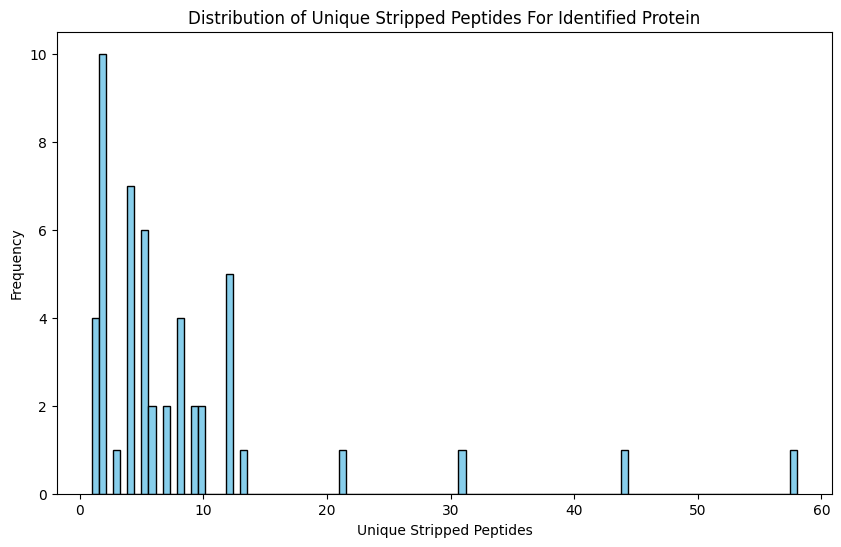

In [32]:
# plot distribution of Unique Stripped Peptides
plt.figure(figsize=(10, 6))
plt.hist(filtered_protein_subset['Unique Stripped Peptides'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Unique Stripped Peptides For Identified Protein')
plt.xlabel('Unique Stripped Peptides')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

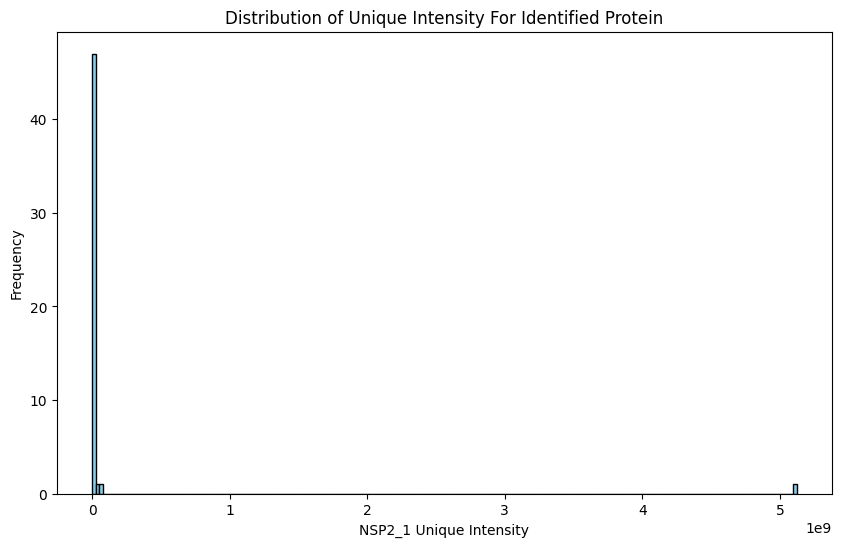

In [33]:
# plot distribution of NSP2_1 Unique Intensity
plt.figure(figsize=(10, 6))
plt.hist(filtered_protein_subset['NSP2_1 Unique Intensity'], bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of Unique Intensity For Identified Protein')
plt.xlabel('NSP2_1 Unique Intensity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

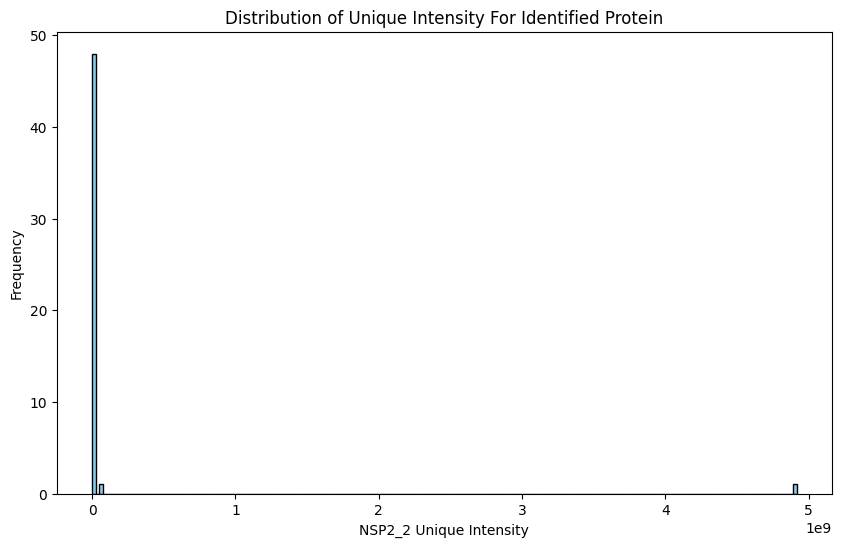

In [34]:
# plot distribution of NSP2_2 Unique Intensity
plt.figure(figsize=(10, 6))
plt.hist(filtered_protein_subset['NSP2_2 Unique Intensity'], bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of Unique Intensity For Identified Protein')
plt.xlabel('NSP2_2 Unique Intensity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

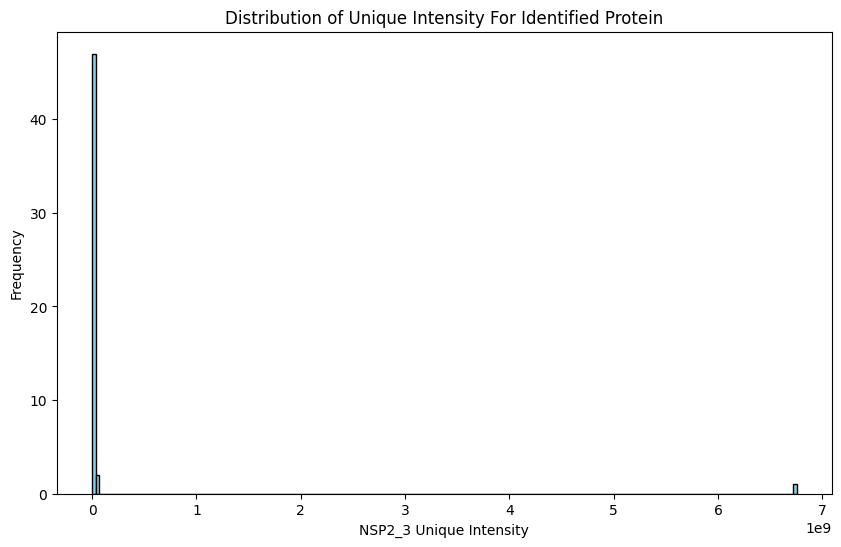

In [35]:
# plot distribution of NSP2_3 Unique Intensity
plt.figure(figsize=(10, 6))
plt.hist(filtered_protein_subset['NSP2_3 Unique Intensity'], bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of Unique Intensity For Identified Protein')
plt.xlabel('NSP2_3 Unique Intensity')
plt.ylabel('Frequency')

In [36]:
# filter dataset to see protein vesus bait
column_list = ['Protein ID', 'NSP2_1 Unique Intensity', 'NSP2_2 Unique Intensity', 'NSP2_3 Unique Intensity']
filtered_protein_bait = filtered_protein_subset[column_list]

# set protein id as index
filtered_protein_bait.set_index('Protein ID', inplace=True)

filtered_protein_bait.describe()

,NSP2_1 Unique Intensity,NSP2_2 Unique Intensity,NSP2_3 Unique Intensity
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.062627e+08,1.019117e+08,1.396384e+08
std,7.238827e+08,6.947668e+08,9.546411e+08
min,9.384800e+04,1.546890e+05,2.262410e+05
25%,5.076788e+05,6.080528e+05,8.078015e+05
50%,1.237408e+06,1.251038e+06,1.480494e+06
75%,3.388316e+06,2.374170e+06,3.098673e+06
max,5.122105e+09,4.916069e+09,6.754567e+09


## Understand what are those proteins

(start with the “Description” column, we will analyse what these proteins are in detail, what pathways they are involved in, and whether any of them represent druggable targets in w10)

In [37]:
column_list = ['Protein ID', 'Description']

description = filtered_protein_subset[column_list]
description.set_index('Protein ID', inplace=True)
description.dropna(inplace=True)
description

<ipython-input-37-0d4c6305dcd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  description.dropna(inplace=True)


,Description
Protein ID,
Q9Y5P8,Serine/threonine-protein phosphatase 2A regula...
Q6Y7W6,GRB10-interacting GYF protein 2
O60573,Eukaryotic translation initiation factor 4E ty...
Q9Y277,Voltage-dependent anion-selective channel prot...
P52306,Rap1 GTPase-GDP dissociation stimulator 1
O00264,Membrane-associated progesterone receptor comp...
P21796,Voltage-dependent anion-selective channel prot...
P00403,Cytochrome c oxidase subunit 2
Q5T1M5,FK506-binding protein 15


In [38]:
import re
from collections import Counter

# set strings
strings = list(description['Description'])

# Function to find common words using regex
def find_common_words(strings):
    # Initialize a counter to keep track of word frequencies
    word_counts = Counter()

    # Regex pattern to match words (ignoring case)
    pattern = re.compile(r'\b\w+\b', re.IGNORECASE)

    # Process each string in the list
    for string in strings:
        # Find all words in the string using regex
        words = pattern.findall(string)
        # Update the counter with these words
        word_counts.update(words)

    # Determine the number of strings to set the threshold for common words
    num_strings = len(strings)

    # Find and return words that appear in 5% strings
    common_words = {word.lower() for word, count in word_counts.items() if count >= num_strings*0.05}

    return common_words

# Call the function and print the common words
common_words = find_common_words(strings)
print("Common words:", common_words)


Common words: {'1', 'diphosphooligosaccharide', 'wash', 'glycosyltransferase', '2', 'beta', 'cytochrome', '3', 'mitochondrial', 'dolichyl', 'complex', 'oxidase', 'c', 'synthase', 'subunit', 'protein', 'g', 'atp'}


## Get gene names column

In [39]:
filtered_protein_list = filtered_protein_2.index

In [40]:
gene_names = combined_protein[combined_protein['Protein ID'].isin(filtered_protein_list)]['Gene Names']
gene_names = list(gene_names)
gene_names

[nan,
 'PPP2R3B',
 'GIGYF2',
 'EIF4E2',
 'VDAC3',
 'RAP1GDS1',
 'PGRMC1',
 'VDAC1',
 'MT-CO2',
 'FKBP15',
 'COX4I1',
 'COX5B',
 'TMPO',
 'KIF26A',
 'ATP5PD',
 'SLC27A2',
 'ELOC',
 'COX7A2',
 'BSG',
 'CANX',
 'UQCRC2',
 'RPN1',
 'COX5A',
 'ATP5PB',
 'WASHC4',
 'COX7C',
 'WASHC2A',
 'UQCRC1',
 'POR',
 'RPN2',
 'GNB1',
 'RNF2',
 'WASHC5',
 'AMOT',
 'MT-ATP6',
 'RRM1',
 'CASP2',
 'DDOST',
 'ATP5MF',
 'NDUFA9',
 'ATP5F1D',
 'CORO1C',
 'ATP5MG',
 'MIEF1',
 'KIF2A',
 'ISCA2',
 'ARPC3',
 'PSMC2',
 'THAP11',
 'IPO5']

## Notes

**Why did we used the "Unique Intensity" instead of "Total Intensity"?**

The best way to determine whether a given protein was present in a sample or not is to look at the “Unique Intensity” column for the sample (e.g. the column titled “qx017098_EGFP_2 Unique Intensity”). A non-zero value means that signal was detected for that protein, indicating that the protein was present in the sample. It’s important that you use the “Unique Intensity” columns rather than the “Total Intensity” columns. The latter is the intensity of all matching peptides, regardless of uniqueness, which we don’t want.